## Load Libraries and Data Sets

In [1]:
%pylab inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 150
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import cv2


Populating the interactive namespace from numpy and matplotlib


In [3]:
train_df = pd.read_excel('/Users/carinaland/Documents/Thesis/05 Data/train_df.xlsx')
test_df = pd.read_excel('/Users/carinaland/Documents/Thesis/05 Data/test_df.xlsx')

# Brightness

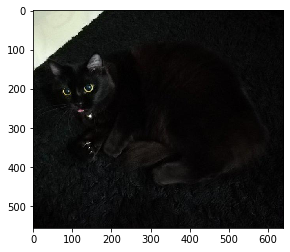

Brightness:   19.62789379212859


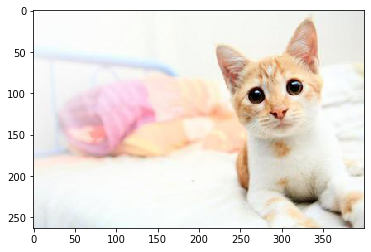

Brightness:   229.2954874335271


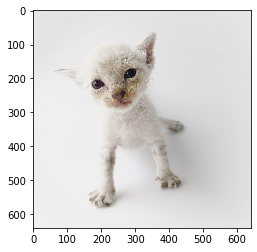

Brightness:   216.5435750700577


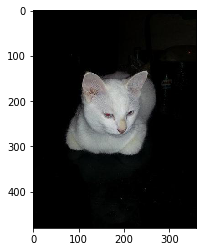

Brightness:   24.34094264928849


In [4]:
os.chdir("/Users/carinaland/Documents/Thesis/05 Data/train_images/")

for petid in ["647fe8d68","185ea5010","23d2b8824","73e86b2fe"]: 
    img = mpimg.imread(petid+"-1.jpg") # select profile images only
    imgplot = plt.imshow(img)
    plt.show()
    if petid in train_df.PetID.values:
        print("Brightness:  ",train_df[train_df.PetID == petid].profile_brightness.values[0])


# Sharpness

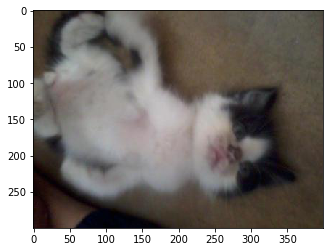

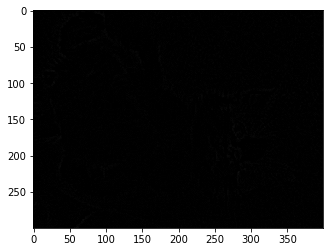

Sharpness:  3.9050484632638898


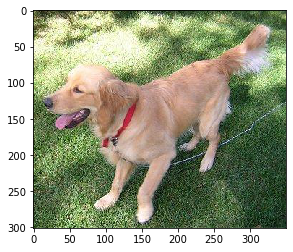

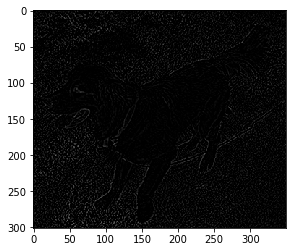

Sharpness:  290.7035389990064


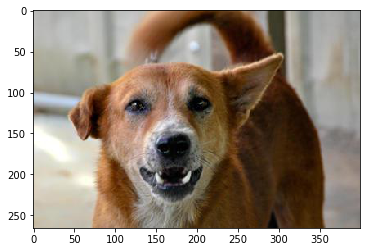

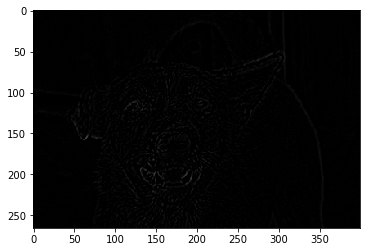

Sharpness:  31.719840896090087


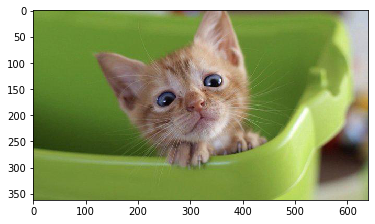

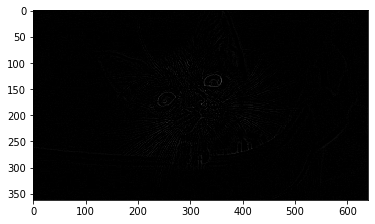

Sharpness:  16.091854708907853


In [7]:
# Problem with blur: Portrait Photos that blur the background 
os.chdir("/Users/carinaland/Documents/Thesis/05 Data/train_images/")

files = ["43b5d3f4d-1.jpg", "013527aeb-1.jpg", "fb278c21e-1.jpg", "fbc8619d9-1.jpg"]

for filename in files:
    img= mpimg.imread(filename)  # load image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # transform to grayscale
    blur = cv2.GaussianBlur(gray,(3,3),0)  # apply gaussian 3x3 filter
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)  # apply laplacian filter
    
    
    imgplot = plt.imshow(img)
    plt.show()
    
    laplacianplot =plt.imshow(laplacian, cmap="gray", vmin= 0, vmax=255)
    plt.show()
    
    petid = filename.split("-")[0]
    if petid in train_df.PetID.values:
        print("Sharpness: ",laplacian.var())  # compute variance 

    #else:
    #    print("Sharpness: ",laplacian.var())


# Pixelsize

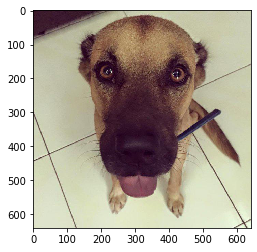

Pixel:        409600


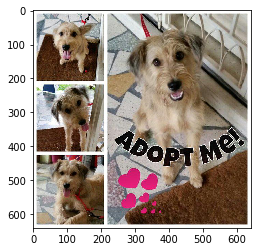

Pixel:        409600


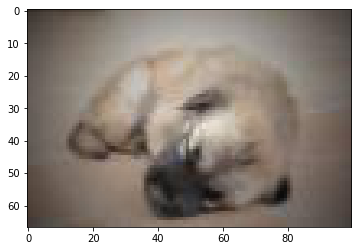

Pixel:        6700


In [8]:
os.chdir("/Users/carinaland/Documents/Thesis/05 Data/train_images/")
for petid in ["3679001f5","310045474","a4cec9f83"]:
    img=mpimg.imread(petid+"-1.jpg")
    imgplot = plt.imshow(img)
    plt.show()
    if petid in train_df.PetID.values:
        print("Pixel:       ",train_df[train_df.PetID == petid].profile_pixel.values[0])